<center><h1>Fernandes_Alrik_HW2</h1></center>
<br>
<br>

Name: Alrik Melville Fernandes
<br>
Github Username: AlrikF
<br>
USC ID: 4036859519


## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np 
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics.pairwise import euclidean_distances
from math import sqrt
import math

Get the Cycle Power Plant Data Set

In [2]:
file   = ".././data/Folds5x2_pp.xlsx"
df = pd.read_excel(file,sheet_name = 0)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


### (b) Exploring the data

#### i. rows and columns

In [3]:
print("There are {} rows in the dataset and {} columns ".format(len(df),len(df.columns)))
print("Each of the rows represnt a single data point/ example of the various parameters and the resulting energy output ")
print("Columns represent the hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), \nExhaust Vacuum (V) (independent variables) to predict the net hourly electrical energy output (PE)(dependent variable)  \nof the plant ")

There are 9568 rows in the dataset and 5 columns 
Each of the rows represnt a single data point/ example of the various parameters and the resulting energy output 
Columns represent the hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), 
Exhaust Vacuum (V) (independent variables) to predict the net hourly electrical energy output (PE)(dependent variable)  
of the plant 


#### ii. pairwise scatterplots of all the varianbles

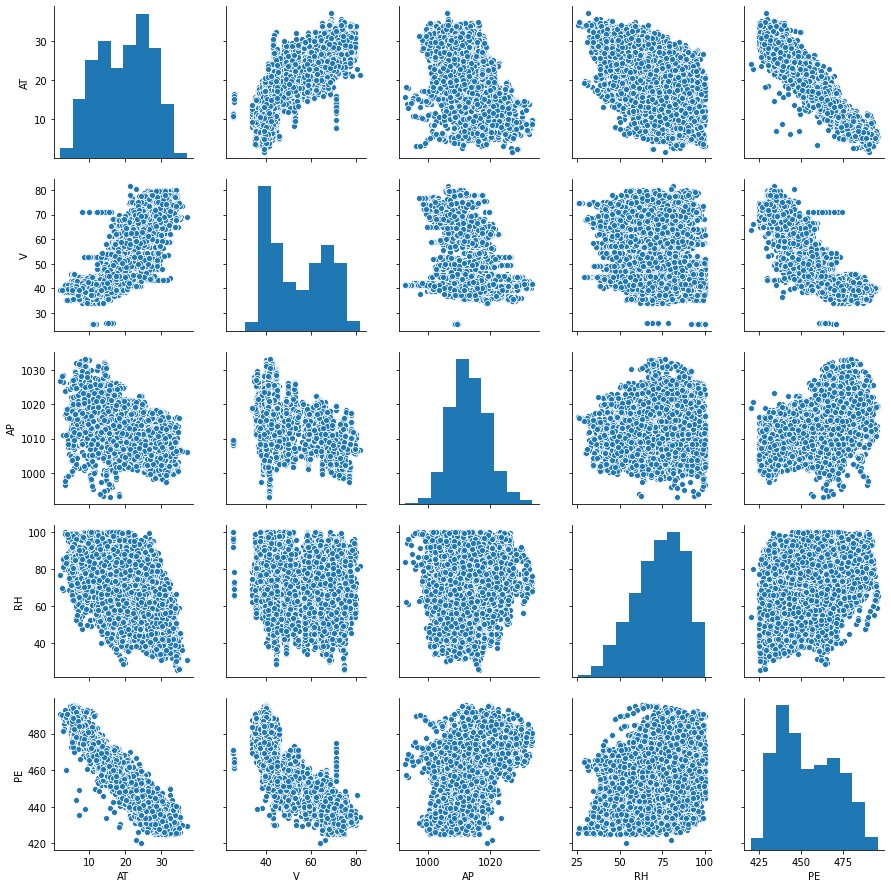

In [4]:
sns.pairplot(df,)

In [5]:
print("There seems to be negative correlation in AT Vs PE, V Vs PE and positive correlation in V Vs AT ")

There seems to be negative correlation in AT Vs PE, V Vs PE and positive correlation in V Vs AT 


#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [6]:
summary= pd.DataFrame({"Mean":[],"Median":[],"Range":[],"First Quartile":[],"Third Quartile":[],"Interquartile Range":[]})

for var in df.columns:
    q1 = float(df[var].quantile([0.25]))
    q3 = float(df[var].quantile([0.75]))
    summary.loc[var]=(df[var].mean(),df[var].median(),df[var].max()-df[var].min(),q1,q3,q3-q1)
summary

,Mean,Median,Range,First Quartile,Third Quartile,Interquartile Range
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (c) Simple Linear Regression

#### Outliers plotted in red and normal in blue


 AT is statistically significant 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:44:20   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497

D:\AnacondaProjects\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.00010795642365809832


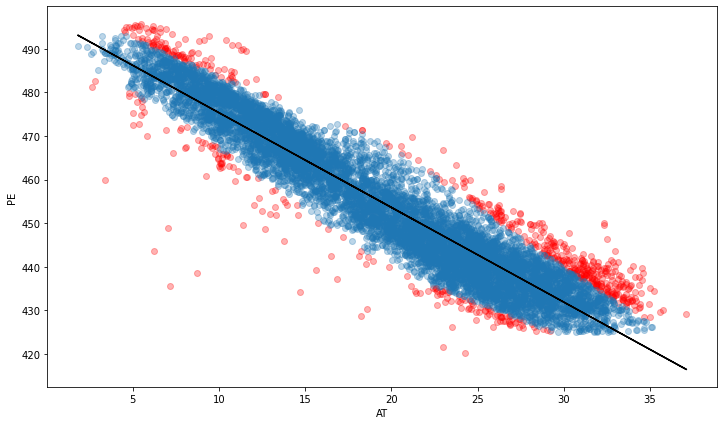

D:\AnacondaProjects\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



 V is statistically significant 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:44:31   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.

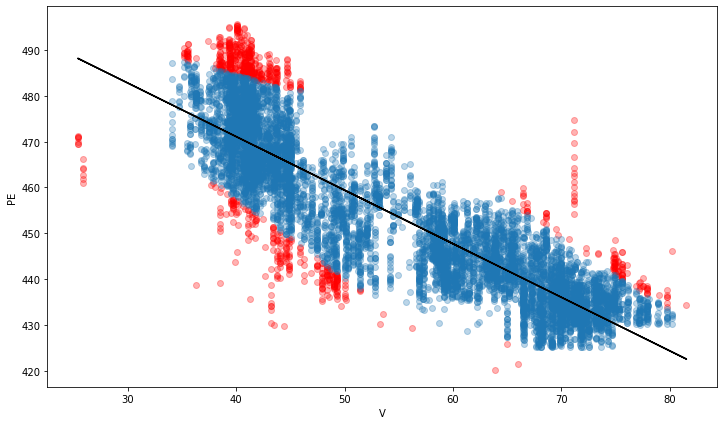


 AP is statistically significant 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:44:42   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055

D:\AnacondaProjects\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.00010392685478770153


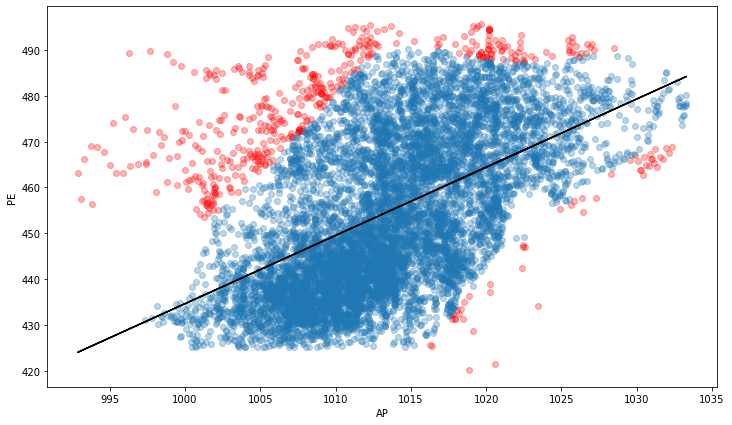

D:\AnacondaProjects\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



 RH is statistically significant 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:44:53   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420

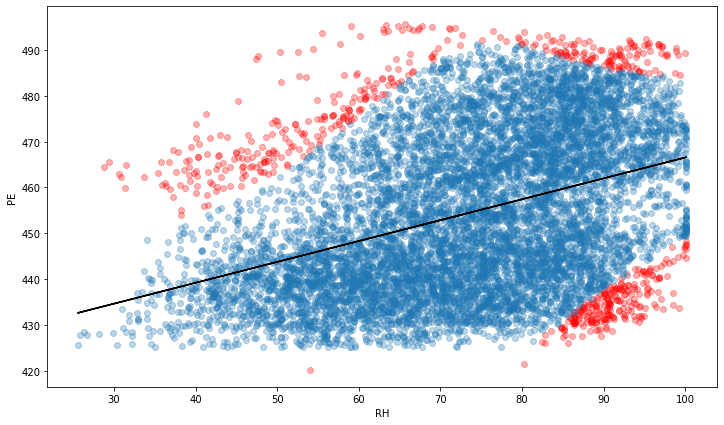

In [7]:
alpha = 0.05
#By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. 
#Hence, you need to use thecommand 'add_constant' so that it also fits an intercept.
coeff = pd.DataFrame(columns=["coeff"])

for var in df.columns[:-1]:
    X = sm.add_constant(df[var])
    model = sm.OLS(df["PE"],X)
    res_model = model.fit()
    coeff.loc[var]=res_model.params[var]
    if res_model.pvalues.loc[var]<alpha:
        print(f"\n {var} is statistically significant \n")
    else:
        print(f"\n {var} is statistically insignificant \n")
    print(res_model.summary())  
    Y = res_model.predict(X)    
    
    infl = res_model.get_influence()
    sm_fr = infl.summary_frame()
    print(sm_fr["cooks_d"].mean())
    
    #Using cooks distance to find outliers 
    outliers = pd.DataFrame(df[(sm_fr["cooks_d"]- 3*sm_fr["cooks_d"].mean())>0][var])
    not_outliers = pd.DataFrame(df[(sm_fr["cooks_d"]- 3*sm_fr["cooks_d"].mean())<=0][var])

    fig, axes = plt.subplots(figsize=(12, 7))
    plt.scatter(outliers ,df[(sm_fr["cooks_d"]- 3*sm_fr["cooks_d"].mean())>0]["PE"],alpha=0.3,color="red", label="Outliers")
    plt.scatter(not_outliers ,df[(sm_fr["cooks_d"]- 3*sm_fr["cooks_d"].mean())<=0]["PE"],alpha=0.3 ,label="Normal")
    plt.plot(df[var],  Y, color="black")
    plt.xlabel(var)
    plt.ylabel("PE")
    plt.show()
    


DF Model is the number of Features
DF residual = Observations - DF Model -1


### (d) Multiple Regression

In [8]:
X=sm.add_constant(df[df.columns[:-1]])
Y=df["PE"]
model = sm.OLS(Y,X)
res_model = model.fit()
print(res_model.summary())
print("\n\n The null hypothesis can be rejected for all the predictors as they are all statistically significant")
multi_coef=res_model.params

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:45:04   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

D:\AnacondaProjects\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### (e) 1c Compare to 1d

Text(0, 0.5, 'Multivariate coefficients')

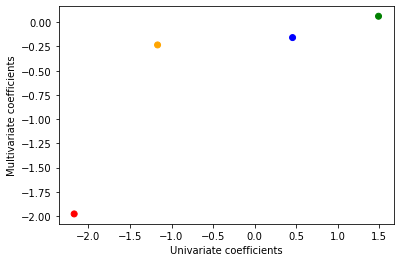

In [9]:
plt.scatter(coeff,multi_coef[1:],color=["red","orange","green","blue"])
plt.xlabel("Univariate coefficients")
plt.ylabel("Multivariate coefficients")

### (f) Nonlinear Association

In [10]:
for var in df.columns[:-1]:
    poly = PolynomialFeatures(degree = 3)
    X_poly = poly.fit_transform(df[var].to_numpy().reshape(-1, 1))
    model = sm.OLS(df["PE"].to_numpy(), X_poly).fit()
    print(f"\n\nFeature {var}:\n")
    print(model.summary())




Feature AT:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:45:04   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    7

In [11]:
print("For Features AT, AP and RH all the p values are very small and hence we can reject the null hypothesis ")
print("For Features V the p values for x^2 is not small so we cannot reject the null hypothesis ")

For Features AT, AP and RH all the p values are very small and hence we can reject the null hypothesis 
For Features V the p values for x^2 is not small so we cannot reject the null hypothesis 


### (g) Interactions of Predictors

In [12]:
predictor_interaction="PE ~ AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH"
model = smf.ols(formula = predictor_interaction, data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:45:04   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

In [13]:
alpha = 0.05
iVars= df.columns[:-1]
print(f"\nFor alpha = {alpha}\n")
for i in range(len(iVars)):
    for j in range(i+1,len(iVars)):
        if model.pvalues.loc[f"{iVars[i]}:{iVars[j]}"]<alpha:
            print(f"{iVars[i]}:{iVars[j]} \tis statistically significant with P value {model.pvalues.loc[f'{iVars[i]}:{iVars[j]}']}" )
        else:
            print(f"{iVars[i]}:{iVars[j]} \tis statistically insignificant as P value {model.pvalues.loc[f'{iVars[i]}:{iVars[j]}']}")
    


For alpha = 0.05

AT:V 	is statistically significant with P value 3.3333576160683996e-117
AT:AP 	is statistically insignificant as P value 0.4520508833682082
AT:RH 	is statistically significant with P value 1.216944266727964e-10
V:AP 	is statistically significant with P value 2.877025899458472e-07
V:RH 	is statistically insignificant as P value 0.08619365980356974
AP:RH 	is statistically significant with P value 0.03360557262192991


### (h) Improvement

In [14]:
X_train, X_test, y_train, y_test = train_test_split( df[df.columns[:-1]], df["PE"], test_size=0.3, random_state=42)




In [15]:
def train_reg_model(model_name,formula , X_train, y_train, X_test, y_test):
    
    model = smf.ols(formula = formula , data = pd.concat([X_train,y_train],axis=1) ).fit()
    y_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test,y_pred)
    y_pred_train = model.predict(X_train)
    train_mse = mean_squared_error(y_train,y_pred_train)
    print("\n\n",model_name)
    print(model.summary())
    return test_mse,train_mse
    


In [16]:
lin_reg_formula = "PE ~ AT+ V + AP + RH"
linear_train_mse,linear_test_mse = train_reg_model("Linear Regression :", lin_reg_formula,X_train,y_train,  X_test, y_test)
print(f"\nTest Error: {linear_train_mse} , Train Error :{linear_test_mse}")



 Linear Regression :
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:45:05   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    467.8414     11.

In [17]:
inter_quad_formula = "PE ~ AT+ V + AP +RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH + + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2)"
test_inter_quad_mse, train_inter_quad_mse = train_reg_model("Inter Quadratic Non Linearities :", inter_quad_formula,X_train,y_train ,  X_test, y_test)
print(f"\nTest Error: {test_inter_quad_mse}, Train Error: {train_inter_quad_mse}")



 Inter Quadratic Non Linearities :
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:45:05   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Inter

In [18]:
inter_quad_significant_formula = "PE ~ AT+ V + AP + RH + AT*V  + AT*RH  + AP*RH +  np.power(AT,2) + np.power(AP,2) + np.power(RH,2)"
test_inter_quad_significant_mse,train_inter_quad_significant_mse =train_reg_model("Inter Quadratic Non Linearities that are significant :", inter_quad_significant_formula,X_train,y_train,  X_test, y_test)
print(f"\nTest Error: {test_inter_quad_significant_mse}, Train Error: {train_inter_quad_significant_mse}")



 Inter Quadratic Non Linearities that are significant :
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:45:05   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

### (i) KNN 

Raw Data Error has best k = 5
15.726819842563568


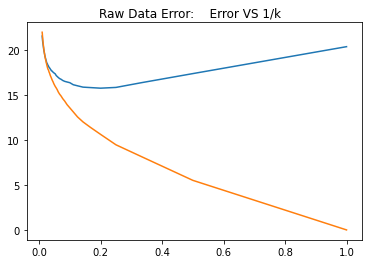

Scaled Data Error has best k = 9
17.03372663114757


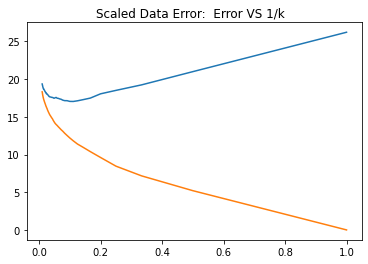

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
x_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

raw_rmse_err = [] 
train_raw_rmse_err = [] 
scale_rmse_err =[]
train_scale_rmse_err =[]
min_raw_err =math.inf
min_scale_err=math.inf
min_raw_k=0
min_scale_k=0

for k in range(1,101):
    #Raw data
    raw_model = neighbors.KNeighborsRegressor(n_neighbors = k)
    raw_model.fit(X_train, y_train)  #fit the model
    raw_pred= raw_model.predict(X_test) #make prediction on test set
    train_pred= raw_model.predict(X_train)
    train_raw_error = (mean_squared_error(y_train,train_pred)) #calculate rmse
    test_raw_error = (mean_squared_error(y_test,raw_pred)) #calculate rmse
    train_raw_rmse_err.append(train_raw_error)
    raw_rmse_err.append(test_raw_error) #store rmse values
    if min_raw_err>=test_raw_error:
        min_raw_err=test_raw_error
        min_raw_k=k
    
    
    
    #Scaled Data
    scale_model = neighbors.KNeighborsRegressor(n_neighbors = k)
    scale_model.fit(x_train_scaled, y_train)  #fit the model
    scale_pred= scale_model.predict(x_test_scaled) #make prediction on test set
    scale_error = mean_squared_error(y_test,scale_pred) #calculate rmse
    scale_rmse_err.append(scale_error) #store rmse values
    train_scale_pred= scale_model.predict(x_train_scaled) #make prediction on test set
    train_scale_error = mean_squared_error(y_train,train_scale_pred) #calculate rmse
    train_scale_rmse_err.append(train_scale_error) #store rmse values
    
    if min_scale_err>scale_error:
        min_scale_err=scale_error
        min_scale_k=k
    

print(f"Raw Data Error has best k = {min_raw_k}")
print(min_raw_err)
test_curve = pd.DataFrame(raw_rmse_err) #elbow curve 
train_curve = pd.DataFrame(train_raw_rmse_err)
plt.plot(1/np.arange(1,101),test_curve, label="Test Raw data")
plt.plot(1/np.arange(1,101),train_curve, label="Train Raw data")
plt.title("Raw Data Error:    Error VS 1/k  ")
plt.show()


print(f"Scaled Data Error has best k = {min_scale_k}")
print(min_scale_err)
scale_curve = pd.DataFrame(scale_rmse_err) #elbow curve
train_scale_curve = pd.DataFrame(train_scale_rmse_err) #elbow curve 
plt.plot(1/np.arange(1,101),scale_curve, label="Test Scaled data")
plt.plot(1/np.arange(1,101),train_scale_curve, label="Train Scaled data")
plt.title("Scaled Data Error:  Error VS 1/k  ")
plt.show()

### (j ) Compare KNN and Linear

In [23]:
compare=pd.DataFrame({"Model":[],"Test MSE":[]})
compare.loc[1]=("Linear Regression", linear_test_mse)
compare.loc[2]=("Inter Quadratic Non Linearities", test_inter_quad_mse)
compare.loc[3]=("Significant Inter Quadratic Non Linearities", test_inter_quad_significant_mse)
compare.loc[4]=("KNN raw", min_raw_err)
compare.loc[5]=("KNN normalized", min_scale_err)

compare

,Model,Test MSE
1,Linear Regression,20.580840
2,Inter Quadratic Non Linearities,18.647312
3,Significant Inter Quadratic Non Linearities,18.694346
4,KNN raw,15.726820
5,KNN normalized,17.033727


In [21]:
print("KNN performs better than linear regression ")

KNN performs better than linear regression 


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

When the dataset and the number of features is small there is a higher possibilty that a inflexible model will underfit the data and the flexible model can capture the trends better and since p is small there is a lesser chance of overfitting 

### (b) The number of predictors p is extremely large, and the number of observations n is small.

When the number of features are high and the data is less then there is a high chance of overfitting so a flexible model will not perform well 

### (c) The relationship between the predictors and response is highly non-linear.

Since the relationship is highly non linear a inflexible model will underfit whereas a flexible model 
will be able to better capture the complex pattern of nonlinear data

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

In case the variance of error terms is high there is a higher chance that the flexible model 
will overfit as it may find a trend in the large error however a inflexible model will not so the 
inflexible model will perform better 

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [22]:
table = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
point = [[0,0,0]]
edist = euclidean_distances(table, point)
pd.DataFrame(edist, columns=["euclidean distance from point"])

,euclidean distance from point
0,3.000000
1,2.000000
2,3.162278
3,2.236068
4,1.414214
5,1.732051


### (b) What is our prediction with K = 1? Why?

The prediction is Green since the single nearest neighbor to [0,0,0] is [-1,0,1] which is green .

### (c) What is our prediction with K = 3? Why?

The three nearest neighbors to our test point is  are observations [2,0,0] "red"  [-1,0,1]"green " and [1,1,1]"Red". So by majority it will be red 

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

A smaller K is more flexible and better adjusted to non linear problems, a large k 
has a more linear boundary hence a smaller k will perform better 